In [3]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
from src.graph import GraphModel 
import src.estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from IPython.display import display
from pyvis.network import Network

import pickle
import os

np.random.seed(42)

In [4]:
path = '../data/connectomes/'
connectomes = os.listdir(path)
connectomes

['rattus.norvegicus_brain_1.graphml',
 'rhesus_brain_1.graphml',
 'mouse_brain_1.graphml']

In [5]:
nx.read_graphml

<function networkx.readwrite.graphml.read_graphml(path, node_type=<class 'str'>, edge_key_type=<class 'int'>, force_multigraph=False, *, backend=None, **backend_kwargs)>

# Mouse Brain

In [48]:
extension = 'graphml'
name = 'mouse_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A
g.shape[0]
s = GraphModel.calculate_spectrum(g)

../data/connectomes/mouse_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_78943/4171854464.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [50]:
est = estimator.LogitRegEstimator(g,p=0)
params, pvalues = est.estimate_parameters()
sigma, alpha, beta = params

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: -1.458    
Date:               2024-04-18 13:52 AIC:              66829.0764
No. Observations:   22731            BIC:              66837.1079
Df Model:           0                Log-Likelihood:   -33414.   
Df Residuals:       22730            LL-Null:          -13594.   
Converged:          1.0000           LLR p-value:      nan       
No. Iterations:     27.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -1.8535     0.0194   -95.6323   0.0000   -1.8915   -1.8155
x1        0.0000        nan        nan      nan       nan       nan
x2        0.0000        nan        nan      nan       nan       nan



/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [51]:
n = g.shape[0]
p = 0

alpha = alpha   #  negative 0.003
beta  = beta    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = sigma    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 50
warm_up     = 5

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [52]:
graph = GraphModel(**params_dict)
graphs, spec = graph.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.5, stability_window=5)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
KS Statistic: 0.056338028169014086
KS Statistic: 0.028169014084507043
KS Statistic: 0.056338028169014086
KS Statistic: 0.107981220657277
Degree Distribution Stable: True
Graph Converged: True






In [9]:
g_est = graphs[-1]
s_est = spec[-1]

## Visualizations

In [10]:
ut = utils.GraphUtils()

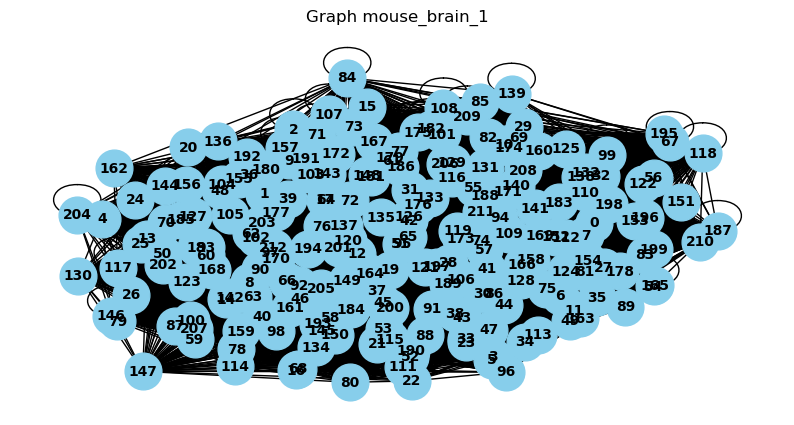

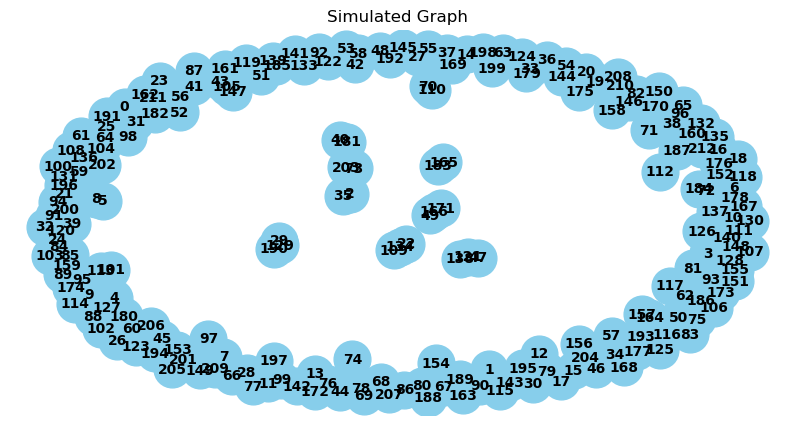

In [11]:
fig = ut.plot_graph_from_adjacency(g, pos=None, title='Graph ' + name, size=(10,5))
fig_est = ut.plot_graph_from_adjacency(g_est, pos=None, title = 'Simulated Graph', size=(10,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


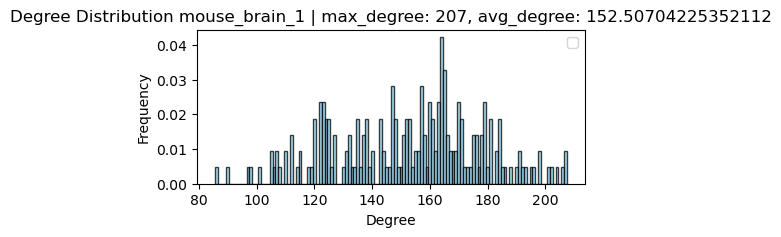

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


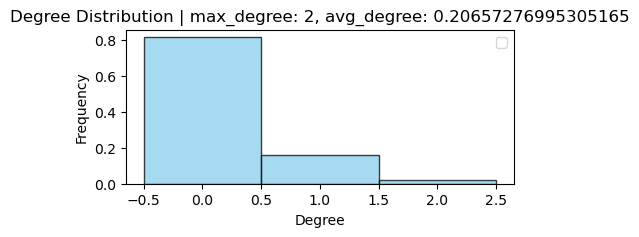

In [12]:
fig = ut.plot_degree_distribution(g, title='Degree Distribution '+name, size=(5,2))
fig_est = ut.plot_degree_distribution(g_est, title='Degree Distribution', size=(5,2))

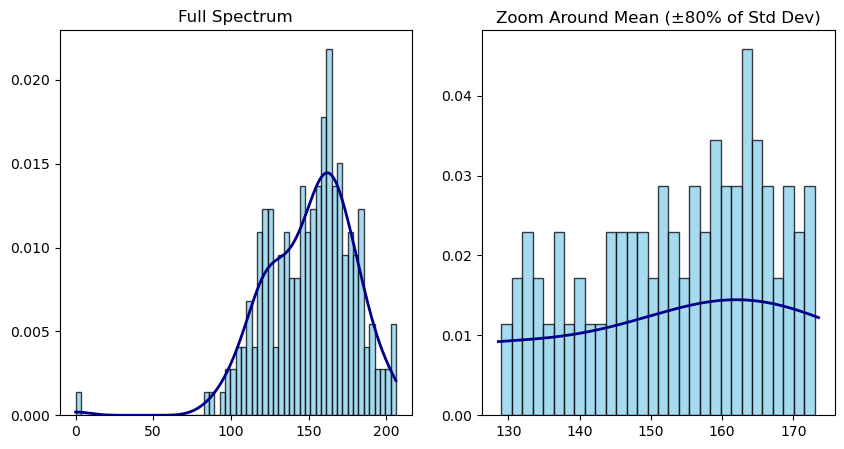

ValueError: `dataset` input should have multiple elements.

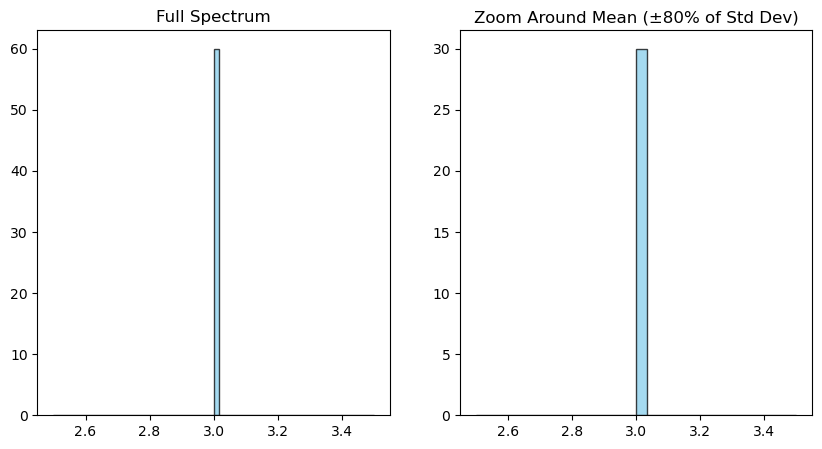

In [13]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
fig = ut.plot_spectrum_and_zoom(s, zoom_scale=0.8, size=(10,5))
fig_est = ut.plot_spectrum_and_zoom(s_est, zoom_scale=0.8, size=(10,5))

## Model Selection

In [14]:
import src.model_selection as ms 

real_graph = nx.from_numpy_array(g)
logit_graph = nx.from_numpy_array(g_est)

selector = ms.ModelSelectorSpectrum(real_graph = real_graph, logit_graph = logit_graph)

# Fit models and find the best model
best_model, model_scores = selector.fit()
print(f'for: {name}')
print(f"The best model is: {best_model}")
print("Model scores:")
for model, score in model_scores.items():
    print(f"{model}: {score}")


for: mouse_brain_1
The best model is: WS
Model scores:
ER: 5.30865603713574
WS: 4.660588662210864
BA: 7.134053799740398
LG: 12.191155546084822


# Rhesus Brain

In [6]:
extension = 'graphml'
name = 'rhesus_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A
g.shape[0]
s = GraphModel.calculate_spectrum(g)

../data/connectomes/rhesus_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_78943/3919072262.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [19]:
est = estimator.LogitRegEstimator(g,p=0)
params, pvalues = est.estimate_parameters(l1_wt=1, alpha=0)
sigma, alpha, beta = params

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.125     
Date:               2024-04-18 13:37 AIC:              17122.5456
No. Observations:   29161            BIC:              17147.3873
Df Model:           2                Log-Likelihood:   -8558.3   
Df Residuals:       29158            LL-Null:          -9779.2   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     15.0000          Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -4.0185     0.0498   -80.6551   0.0000   -4.1161   -3.9208
x1        0.0513     0.0013    39.4490   0.0000    0.0487    0.0538
x2        0.0408     0.0014    29.7214   0.0000    0.0382    0.0435



In [22]:
n = g.shape[0]
p = 0

alpha = alpha   #  negative 0.003
beta  = beta    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = sigma    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 50
warm_up     = 5

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [23]:
graph = GraphModel(**params_dict)
graphs, spec = graph.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.5, stability_window=5)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.11983471074380166
KS Statistic: 0.1115702479338843
KS Statistic: 0.17768595041322313
KS Statistic: 0.10330578512396695
Degree Distribution Stable: True
Graph Converged: True






In [24]:
g_est = graphs[-1]
s_est = spec

## Visualizations

In [25]:
ut = utils.GraphUtils()

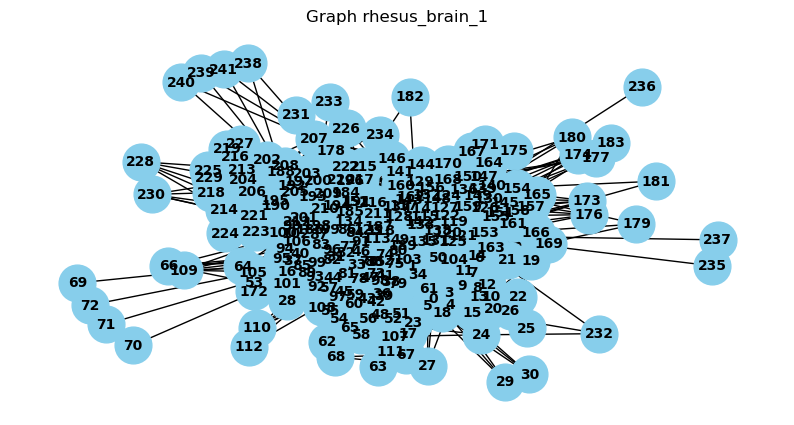

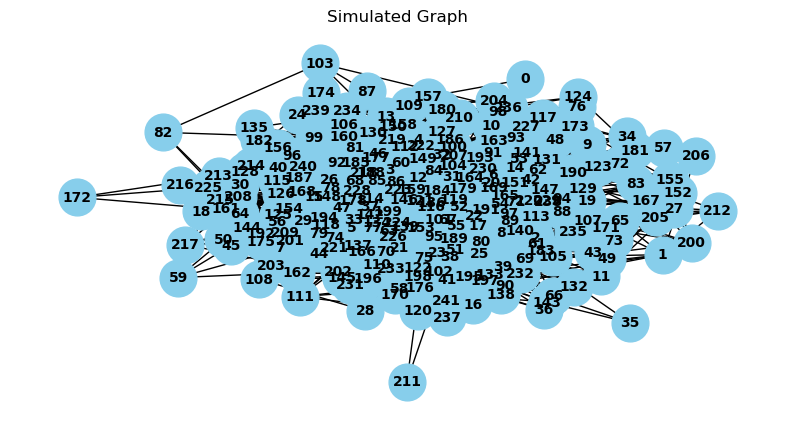

In [26]:
fig = ut.plot_graph_from_adjacency(g, pos=None, title='Graph ' + name, size=(10,5))
fig_est = ut.plot_graph_from_adjacency(g_est, pos=None, title = 'Simulated Graph', size=(10,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


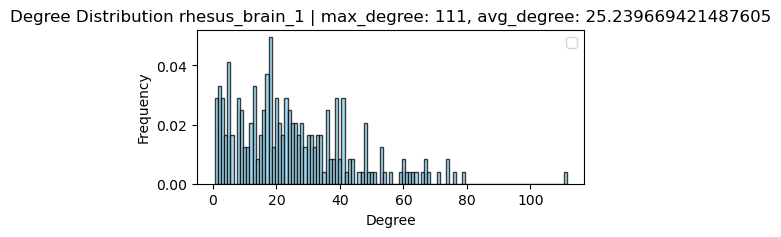

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


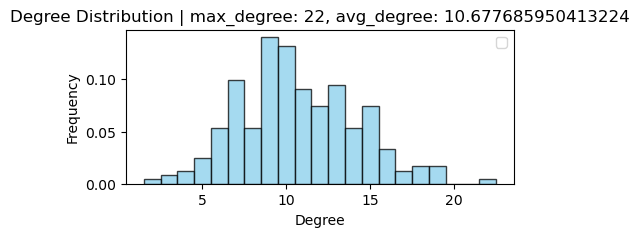

In [27]:
fig = ut.plot_degree_distribution(g, title='Degree Distribution '+name, size=(5,2))
fig_est = ut.plot_degree_distribution(g_est, title='Degree Distribution', size=(5,2))

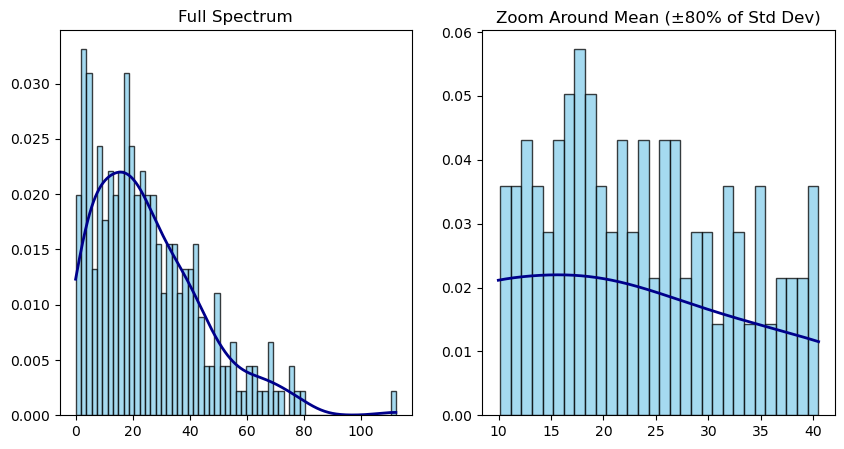

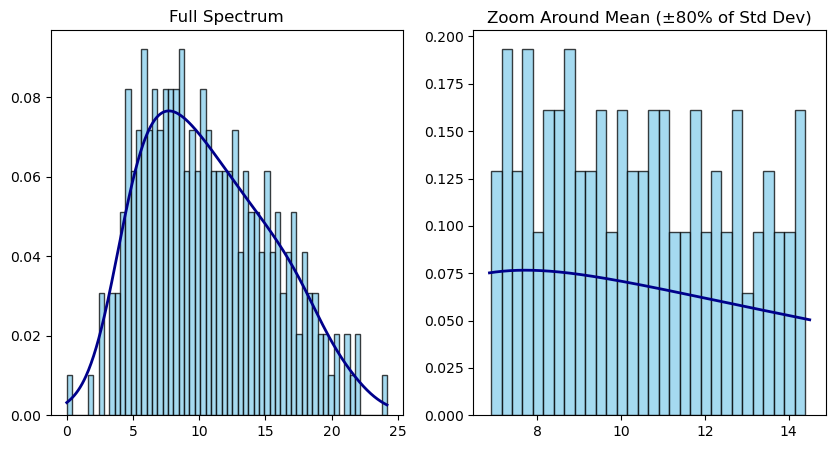

In [28]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
fig = ut.plot_spectrum_and_zoom(s, zoom_scale=0.8, size=(10,5))
fig_est = ut.plot_spectrum_and_zoom(s_est, zoom_scale=0.8, size=(10,5))

## Model selection

In [30]:
import src.model_selection as ms 
real_graph = nx.from_numpy_array(g)
logit_graph = nx.from_numpy_array(g_est)

selector = ms.ModelSelectorSpectrum(real_graph = real_graph, logit_graph = logit_graph)

# Fit models and find the best model
best_model, model_scores = selector.fit()
print(f'for: {name}')
print(f"The best model is: {best_model}")
print("Model scores:")
for model, score in model_scores.items():
    print(f"{model}: {score}")


for: rhesus_brain_1
The best model is: LG
Model scores:
ER: 11.136794190927757
WS: 12.869576586607494
BA: 12.879482591783605
LG: 10.633248762901292


# Rattus norvegicus

In [31]:
extension = 'graphml'
name = 'rattus.norvegicus_brain_1'
file_path = f'{path}{name}.{extension}'
print(file_path)
connectome = nx.read_graphml(file_path)
g = nx.adjacency_matrix(connectome).A
g.shape[0]
s = GraphModel.calculate_spectrum(g)

../data/connectomes/rattus.norvegicus_brain_1.graphml


/var/folders/ns/zy_pbb_s3591fwh2_q7z6g0h0000gn/T/ipykernel_78943/2364455897.py:6: VisibleDeprecationWarning: `.A` is deprecated and will be removed in v1.14.0. Use `.toarray()` instead.
  g = nx.adjacency_matrix(connectome).A


In [33]:
est = estimator.LogitRegEstimator(g,p=0)
params, pvalues = est.estimate_parameters()
sigma, alpha, beta = params

                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.206     
Date:               2024-04-18 13:38 AIC:              95295.4301
No. Observations:   126253           BIC:              95324.6682
Df Model:           2                Log-Likelihood:   -47645.   
Df Residuals:       126250           LL-Null:          -59974.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     18.0000          Scale:            1.0000    
-------------------------------------------------------------------
         Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const   -3.6090     0.0209   -172.9343   0.0000   -3.6499   -3.5681
x1       0.0120     0.0001     87.4033   0.0000    0.0118    0.0123
x2       0.0086     0.0001     79.0784   0.0000    0.0084    0.0088



/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 3 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/Users/maruanottoni/miniforge3/envs/gt/lib/python3.12/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


In [35]:
n = g.shape[0]
p = 0

alpha = alpha   #  negative 0.003
beta  = beta    #  negative the higher the more concentrated will be the edges into a single vertex 0.003
sigma = sigma    # intercept the higher the harder for creating edges 6

threshold   = 0.5
n_iteration = 50
warm_up     = 5

params_dict = {
    "n": n,
    "p": p,
    "alpha": alpha,
    "beta": beta,
    "sigma": sigma,
    "threshold": threshold,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [36]:
graph = GraphModel(**params_dict)
graphs, spec = graph.populate_edges( warm_up = warm_up, max_iterations = n_iteration, degree_dist_threshold=0.5, stability_window=5)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
KS Statistic: 0.033797216699801194
KS Statistic: 0.04970178926441352
KS Statistic: 0.0536779324055666
KS Statistic: 0.03777335984095427
Degree Distribution Stable: True
Graph Converged: True






In [42]:
g_est = graphs[-1]
s_est = spec

## Visualizations

In [43]:
ut = utils.GraphUtils()

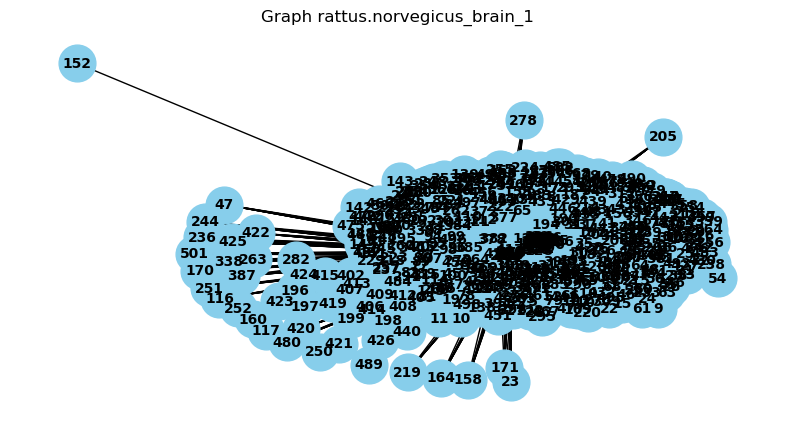

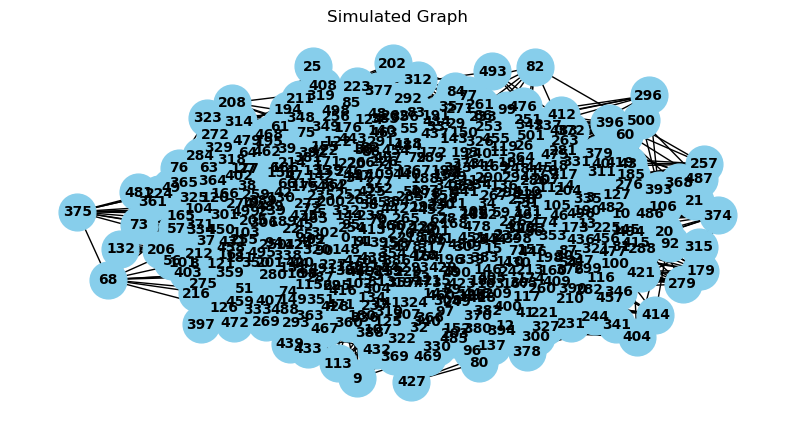

In [44]:
fig = ut.plot_graph_from_adjacency(g, pos=None, title='Graph ' + name, size=(10,5))
fig_est = ut.plot_graph_from_adjacency(g_est, pos=None, title = 'Simulated Graph', size=(10,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


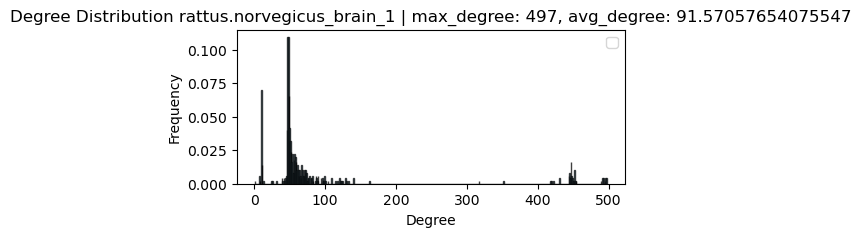

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


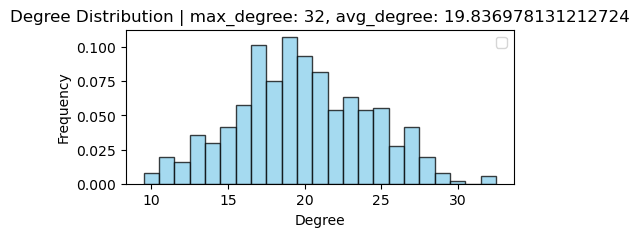

In [45]:
fig = ut.plot_degree_distribution(g, title='Degree Distribution '+name, size=(5,2))
fig_est = ut.plot_degree_distribution(g_est, title='Degree Distribution', size=(5,2))

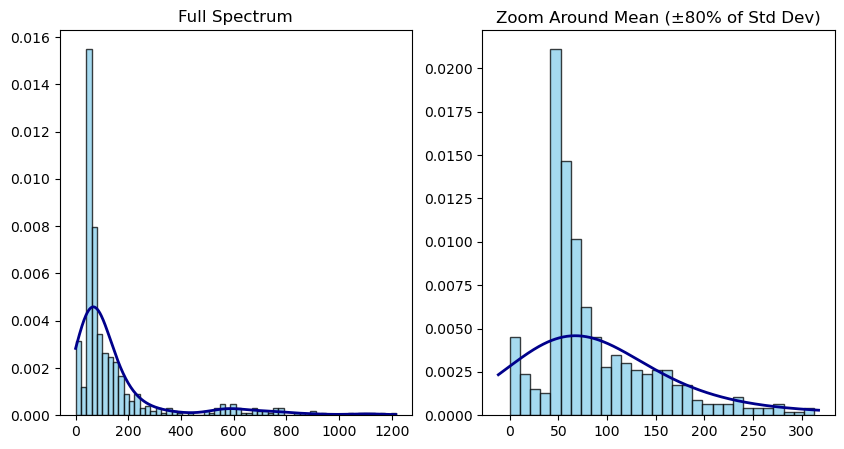

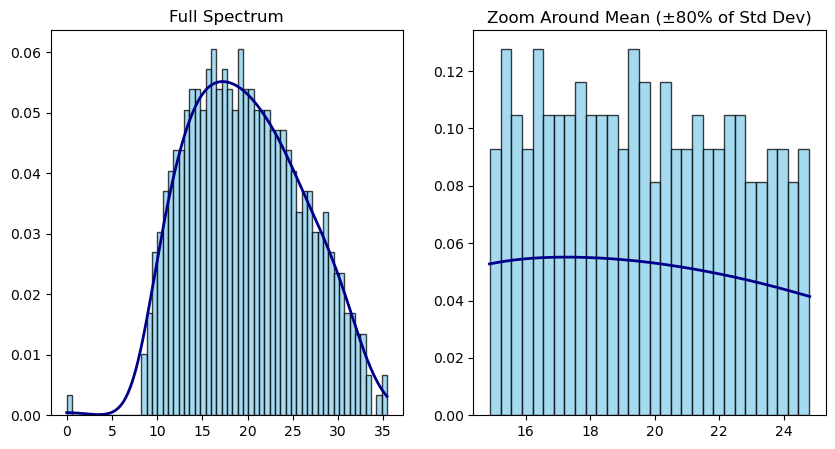

In [46]:
graph_model = GraphModel
s = graph_model.calculate_spectrum(g)
fig = ut.plot_spectrum_and_zoom(s, zoom_scale=0.8, size=(10,5))
fig_est = ut.plot_spectrum_and_zoom(s_est, zoom_scale=0.8, size=(10,5))

## Model selection

In [47]:
import src.model_selection as ms 
real_graph = nx.from_numpy_array(g)
logit_graph = nx.from_numpy_array(g_est)

selector = ms.ModelSelectorSpectrum(real_graph = real_graph, logit_graph = logit_graph)

# Fit models and find the best model
best_model, model_scores = selector.fit()
print(f'for: {name}')
print(f"The best model is: {best_model}")
print("Model scores:")
for model, score in model_scores.items():
    print(f"{model}: {score}")


for: rattus.norvegicus_brain_1
The best model is: WS
Model scores:
ER: 0.6932608291378219
WS: -1.0113198168445177
BA: 0.5550410808393447
LG: -0.7212272064978165
